# 데이터의 roll-off를 관찰하는 프로그램

In [10]:
import pandas as pd
from IPython.display import Audio, display
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [11]:
seed = 42
# seed = 123
# seed = 9903
train_file = "train.csv"
test_file = "test.csv"

In [12]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


In [13]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

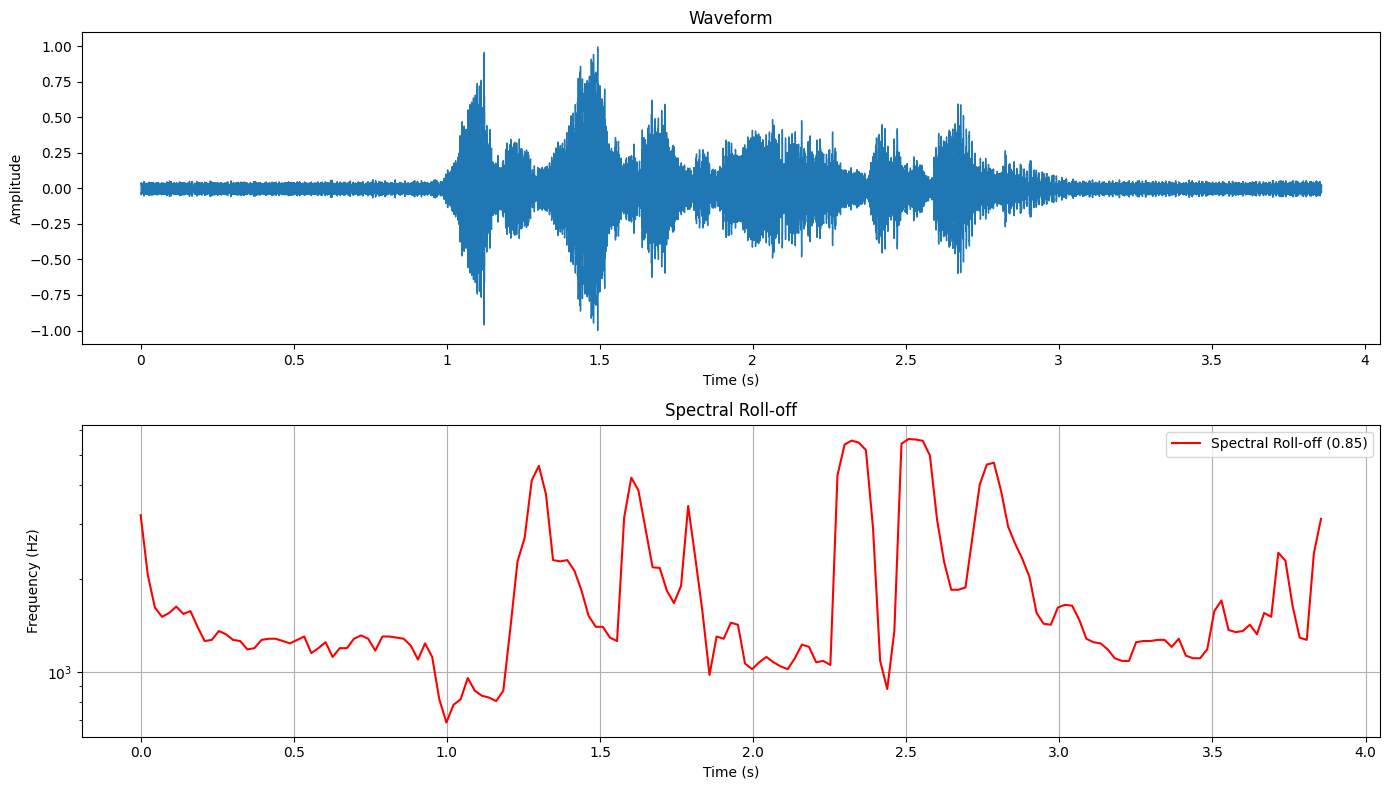

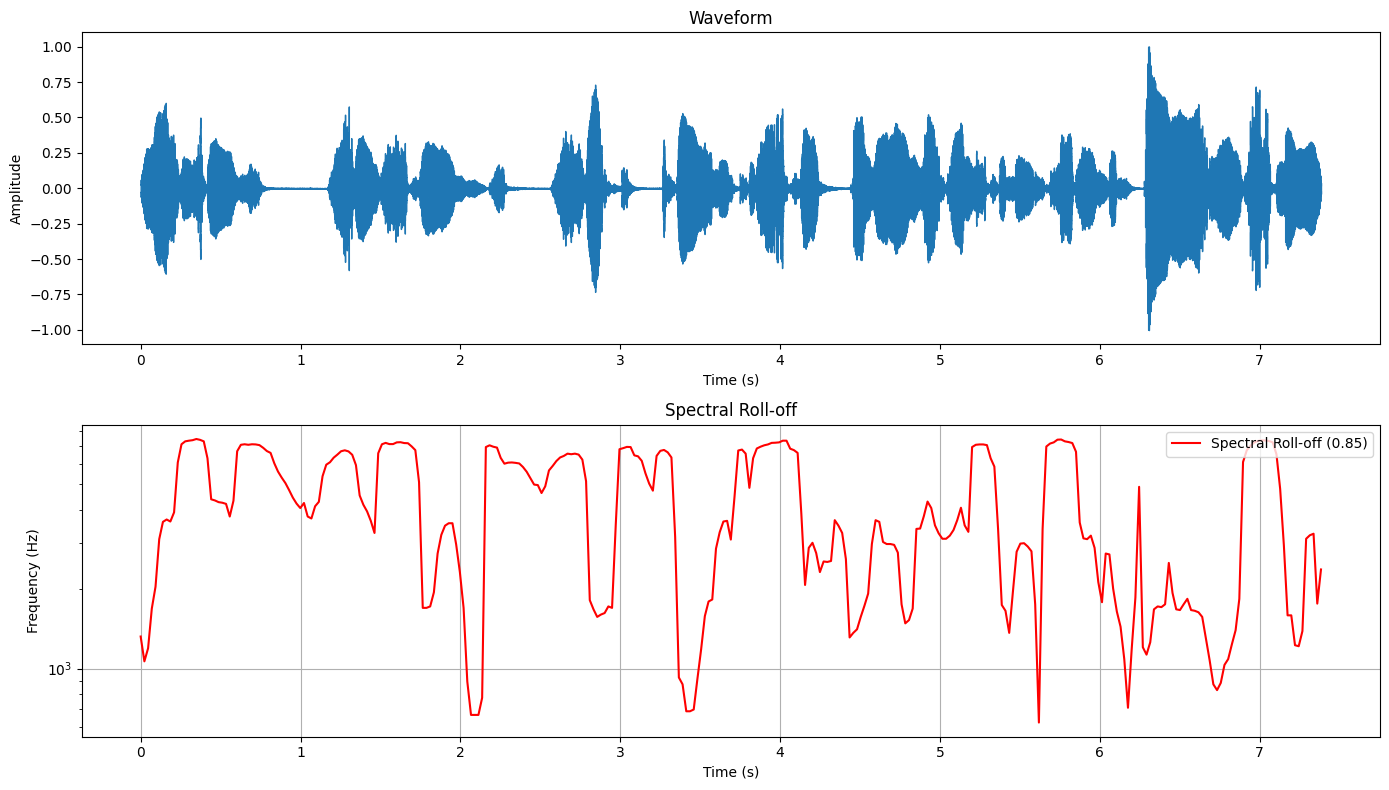

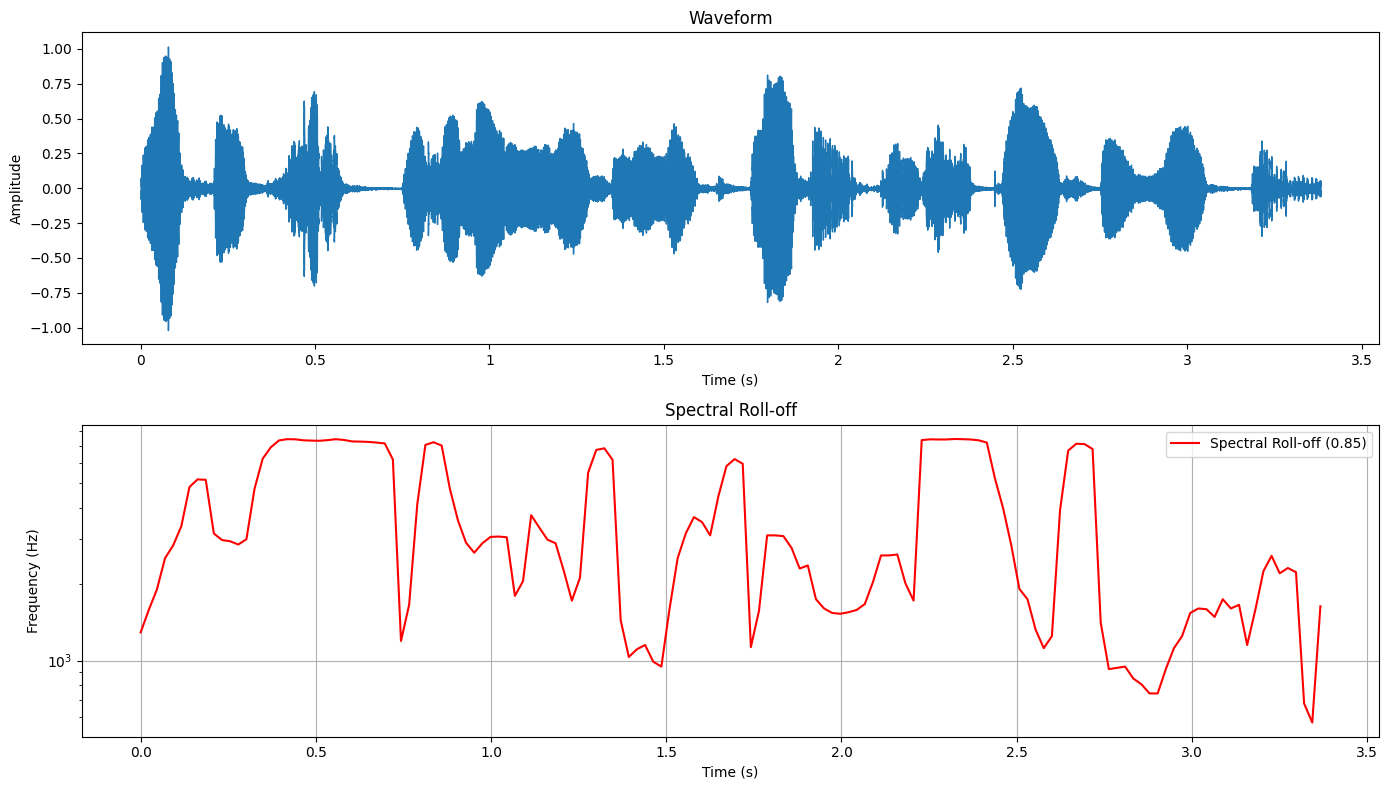

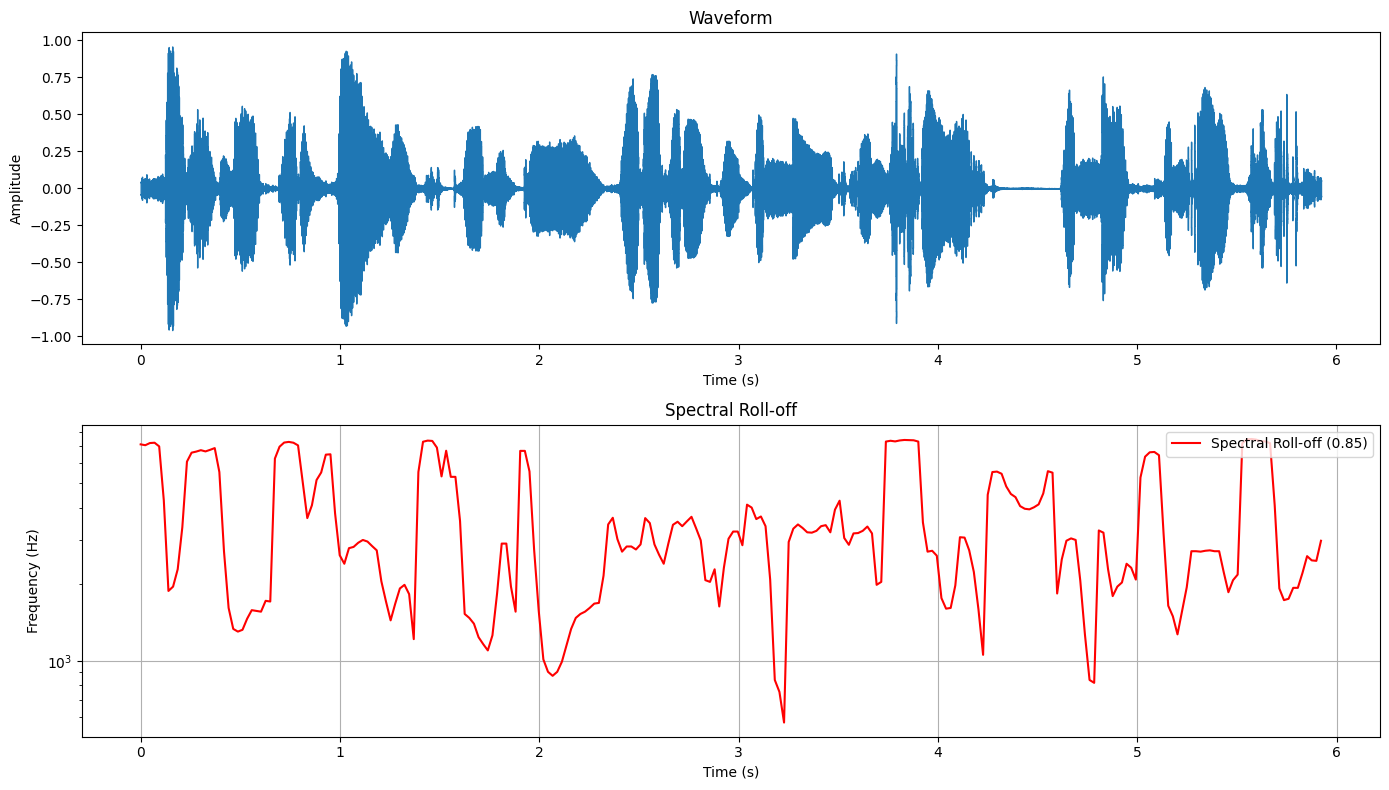

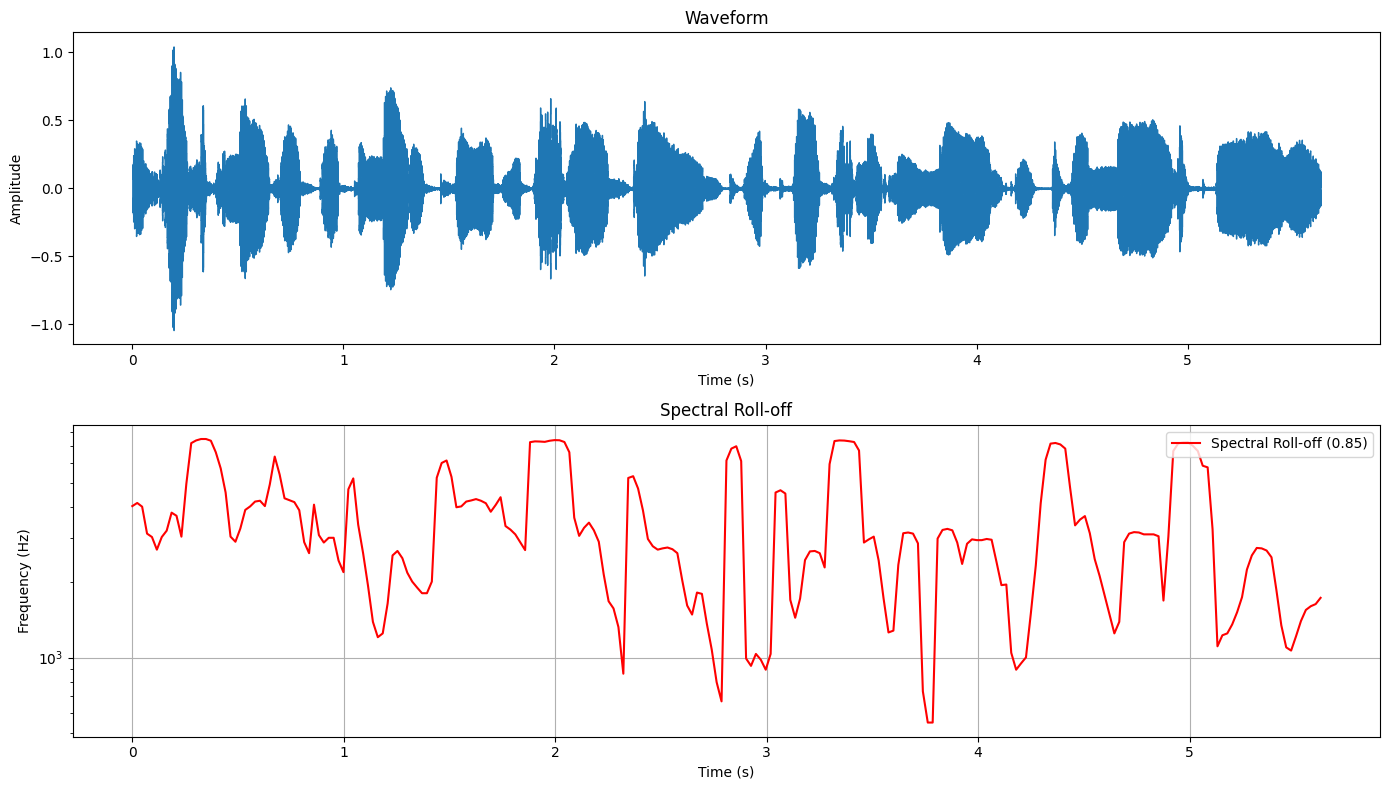

In [14]:
for index, row in train_sample_real_df.iterrows():
    # 음성 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)

    # 스펙트럼 롤오프 계산 (기본 값: 롤오프 임계값 0.85)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)

    # 시간 축 생성
    frames = range(len(rolloff[0]))
    t = librosa.frames_to_time(frames, sr=sr)

    # 원본 파형 시각화
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # 스펙트럼 롤오프 시각화
    plt.subplot(2, 1, 2)
    plt.semilogy(t, rolloff[0], label='Spectral Roll-off (0.85)', color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectral Roll-off')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## train fake

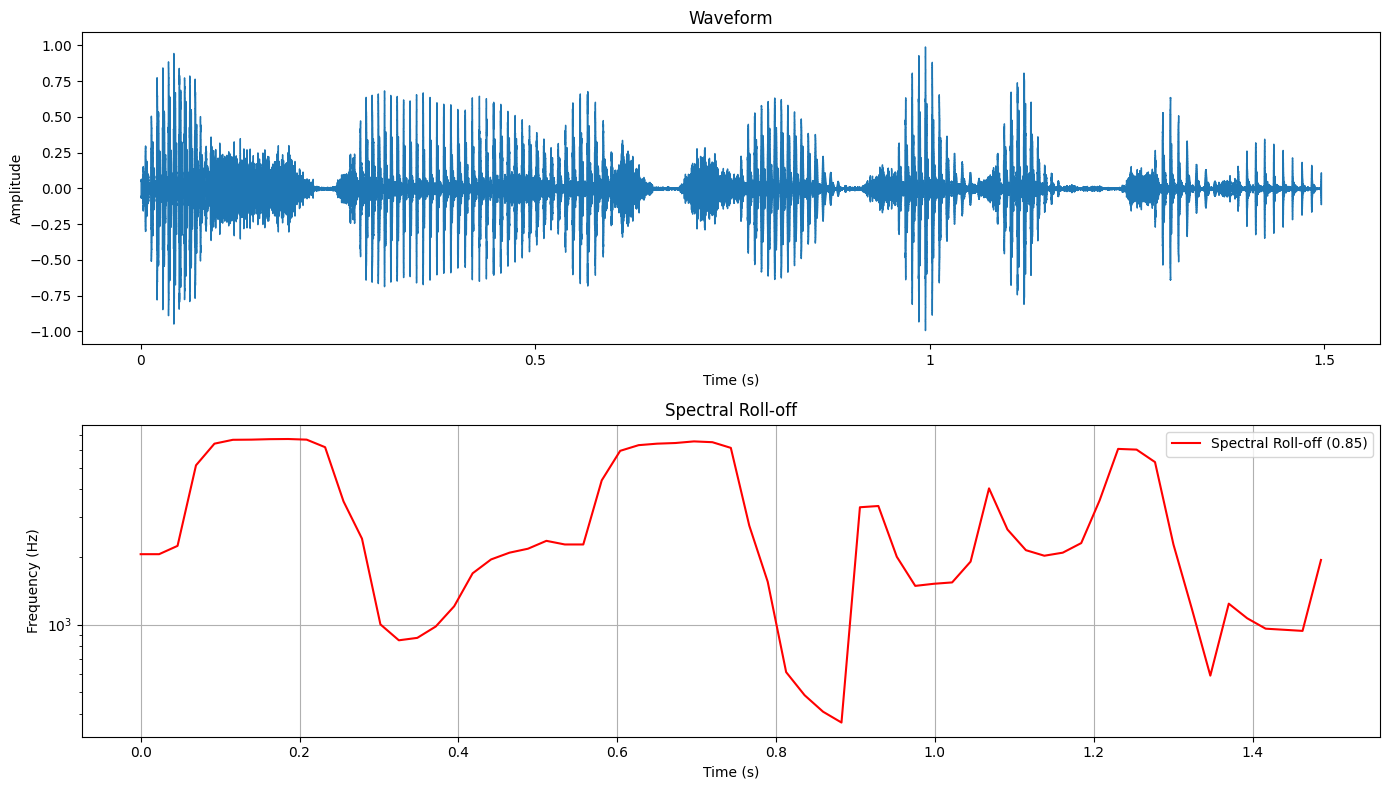

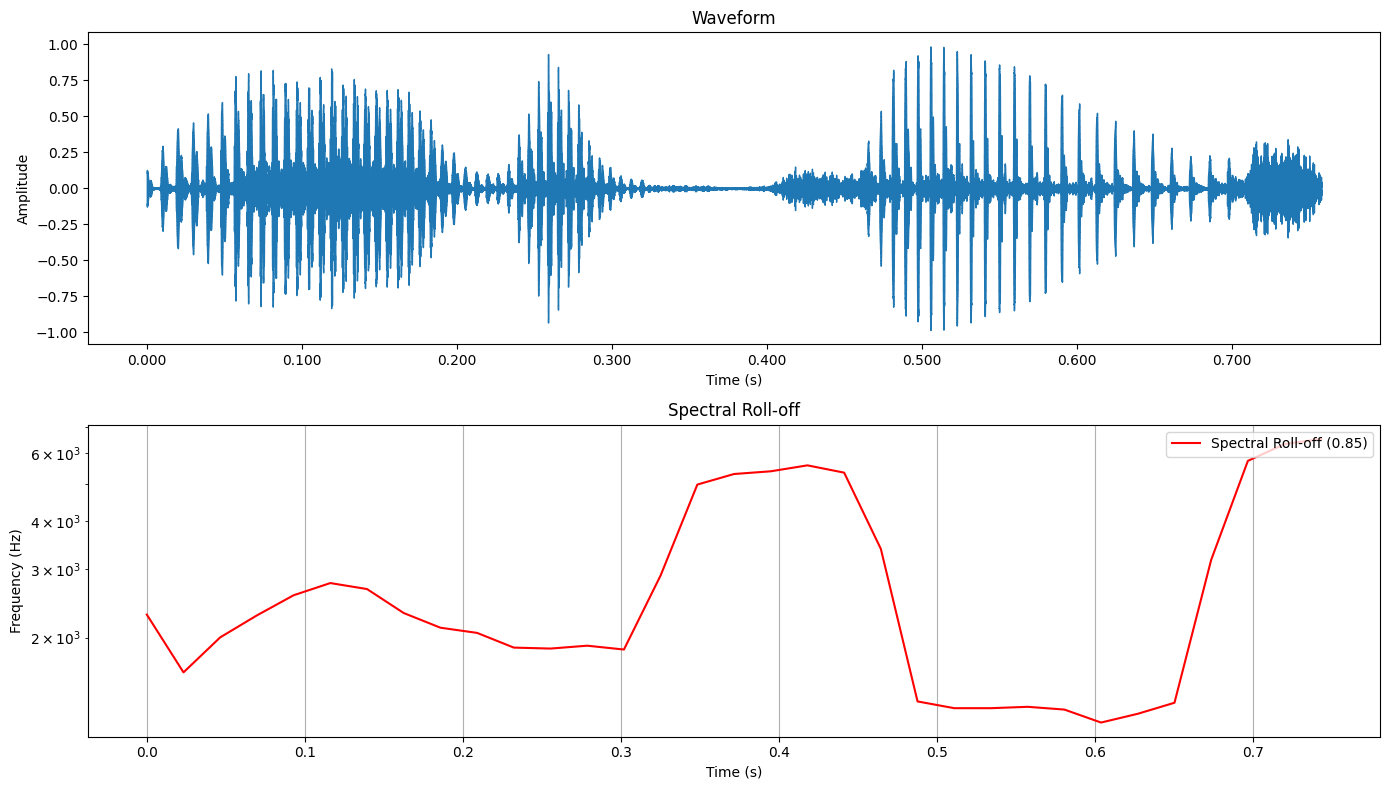

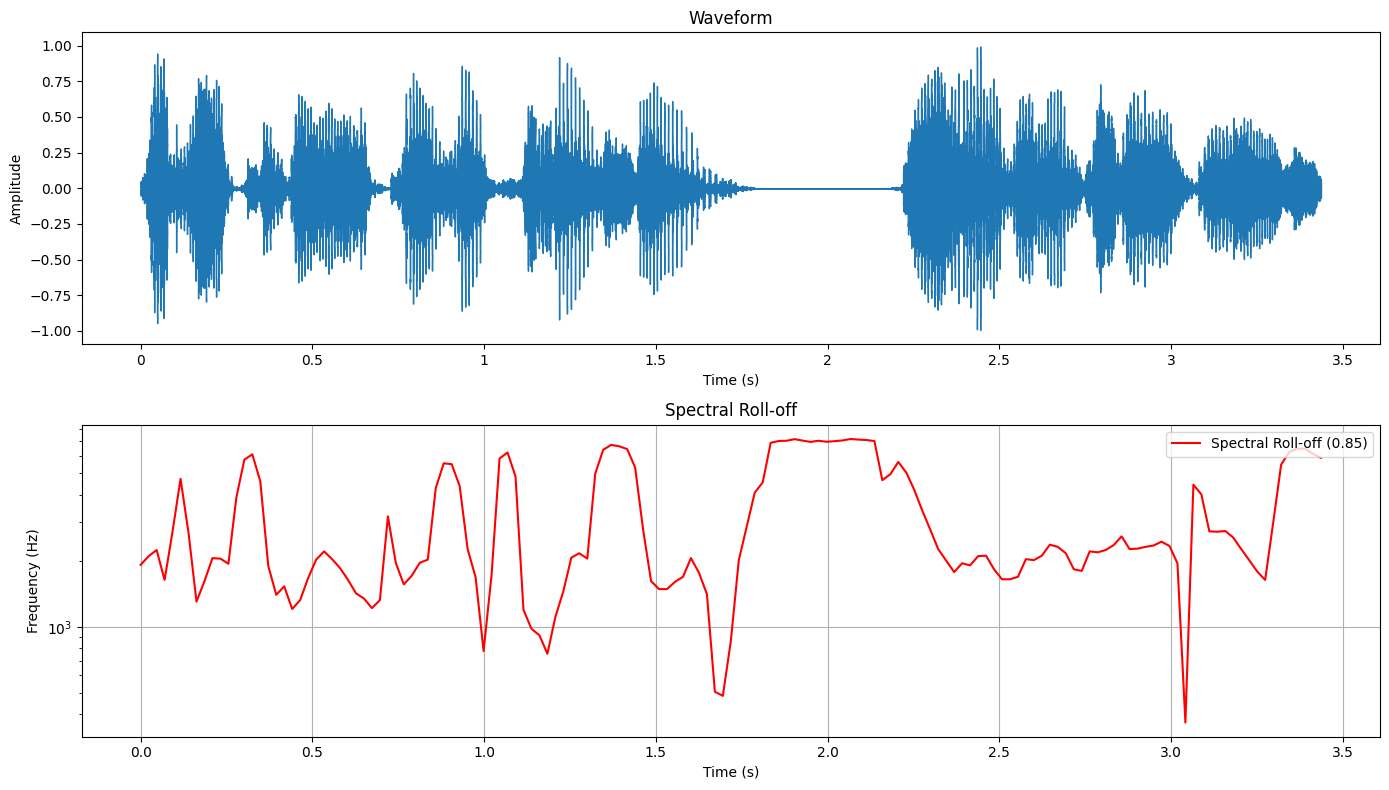

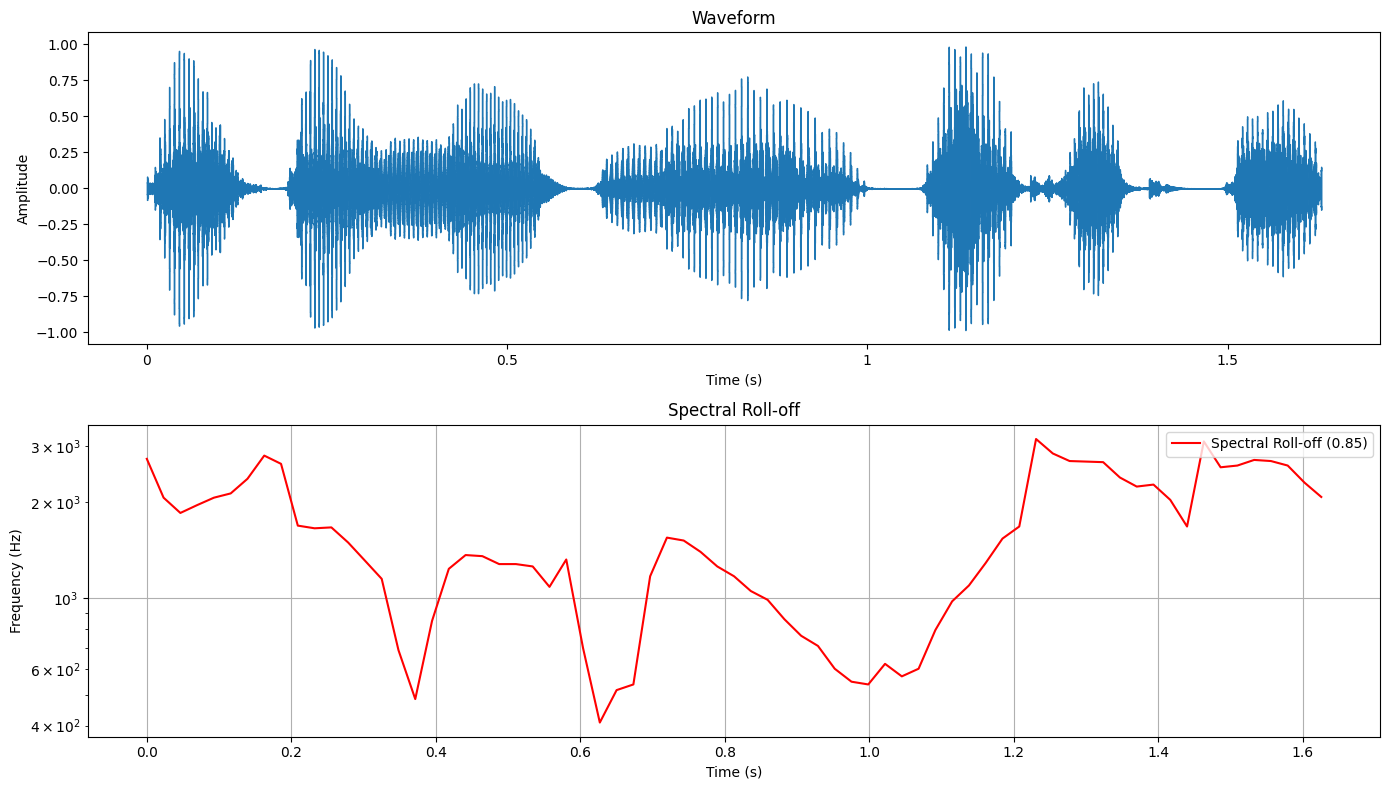

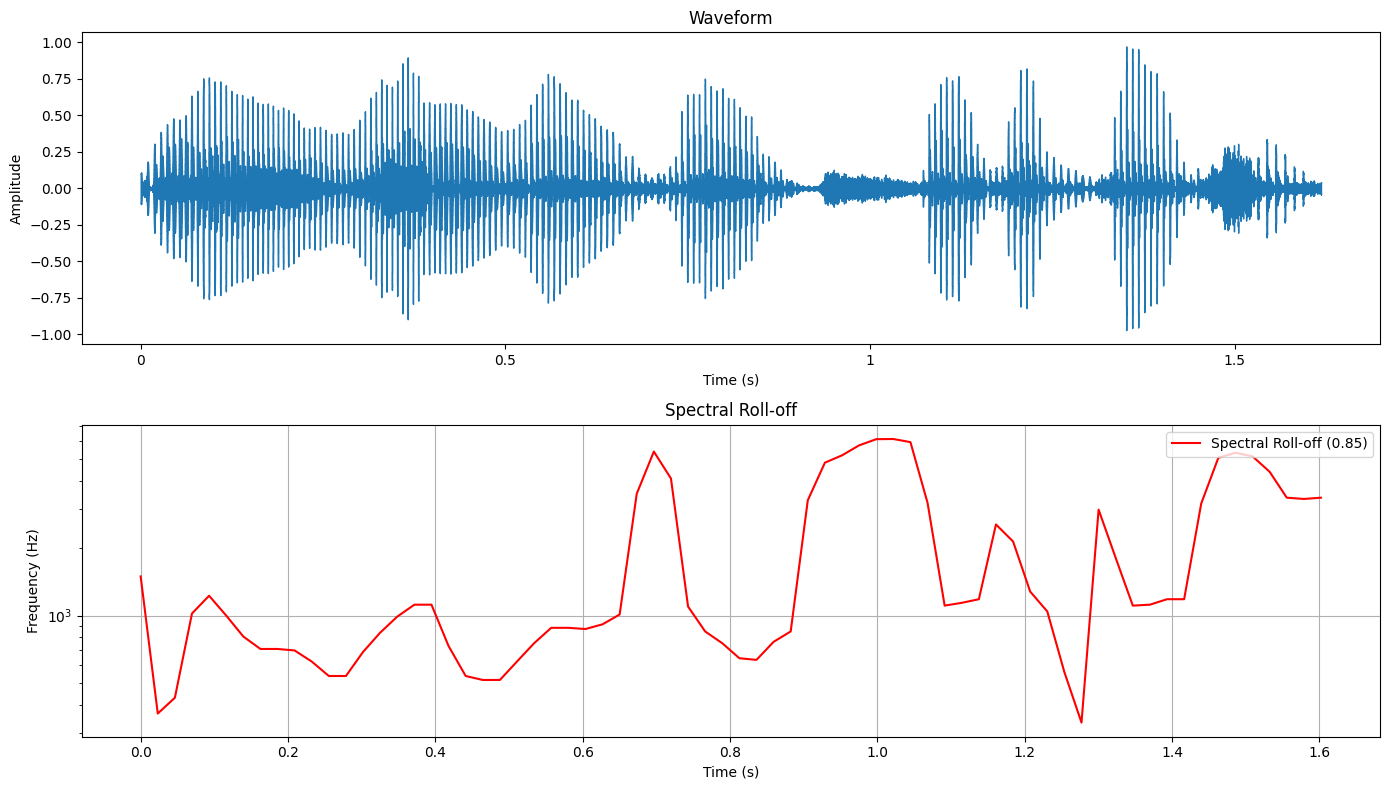

In [15]:
for index, row in train_sample_fake_df.iterrows():
    # 음성 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)

    # 스펙트럼 롤오프 계산 (기본 값: 롤오프 임계값 0.85)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)

    # 시간 축 생성
    frames = range(len(rolloff[0]))
    t = librosa.frames_to_time(frames, sr=sr)

    # 원본 파형 시각화
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # 스펙트럼 롤오프 시각화
    plt.subplot(2, 1, 2)
    plt.semilogy(t, rolloff[0], label='Spectral Roll-off (0.85)', color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectral Roll-off')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [9]:
for index, row in test_sample_df.iterrows():
    audio_file = row['path']
    print(f"Playing audio file: {audio_file}")
    display(Audio(audio_file))

Playing audio file: ./test/TEST_33553.ogg


Playing audio file: ./test/TEST_09427.ogg


Playing audio file: ./test/TEST_00199.ogg


Playing audio file: ./test/TEST_12447.ogg


Playing audio file: ./test/TEST_39489.ogg
